# manipulate OSM map by geopanda feature
Author : Gwanjun Shin


you must convert OSM into getjson (you can use JOSM)


In [6]:
import matplotlib.pyplot as plt
%matplotlib notebook
import osmnx
import osmnx as ox, networkx as nx, geopandas as gpd
import shapely
import geopandas as gpd

In [3]:
!ls OSM_study/

AutonomouStuff_20191119_134123.geojson	GUILDFORD_FARNHAM_20191202_131902.zip
AutonomouStuff_20191119_134123.osm	NCP_Murphys_20191202_141137.osm
AutonomouStuff_20191119_134123.zip	NCP_Murphys_20191202_141137.zip
GUILDFORD_FARNHAM_20191202_131902.osm


In [17]:
ap = gpd.read_file("OSM_study/AutonomouStuff_20191119_134123.geojson")


<IPython.core.display.Javascript object>


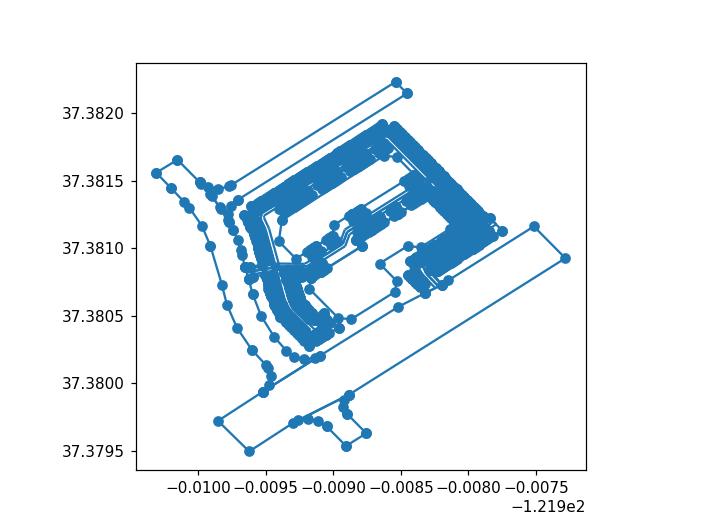

In [11]:
ap.plot()

In [19]:
ap.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

we can get Geo Coordinate system by `crs` postfix    
and as a result said, conversion OSM into geojson is well done

and Coord system is EPSG 4326, which imply its coord system based on Lat, Lng

In [59]:
ap

,ele,cad_id,geom_height,level,near_roads,parking_type,subtype,type,geometry
0,0.0031749999999999999,None,None,None,None,None,None,None,POINT (-121.90829 37.38099)
1,-0.29899999999999999,None,None,None,None,None,None,None,POINT (-121.90953 37.38050)
2,-0.29999999999999999,None,None,None,None,None,None,None,POINT (-121.90792 37.38118)
3,None,323289,0.0,0,[],Parking_Space_1,parking,multipolygon,"LINESTRING (-121.90919 37.38156, -121.90916 37..."
4,0.0031749999999999999,None,None,None,None,None,None,None,POINT (-121.90807 37.38099)
...,...,...,...,...,...,...,...,...,...
1815,0.0031749999999999999,None,None,None,None,None,None,None,POINT (-121.90878 37.38182)
1816,0.0031749999999999999,None,None,None,None,None,None,None,POINT (-121.90923 37.38040)
1817,0.0031749999999999999,None,None,None,None,None,None,None,POINT (-121.90915 37.38100)
1818,None,None,None,0,None,None,None,None,"LINESTRING (-121.90930 37.38056, -121.90933 37..."


### You can serpate geo infra type by column data

If it possible, we can distiguish, Non-Lane structure and Lane Structure

Which important for HD Map

In [20]:
list(ap['cad_id'])

[None,
 None,
 None,
 '323289',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 '327813',
 None,
 None,
 None,
 '326356',
 '326038',
 None,
 None,
 '323349',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 '327175',
 None,
 '323345',
 None,
 None,
 None,
 '325020',
 None,
 '325076',
 '324405',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 '328255',
 None,
 None,
 '323165',
 '323347',
 None,
 None,
 None,
 None,
 None,
 '323119',
 None,
 None,
 None,
 '325784',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 '324340',
 None,
 None,
 None,
 None,
 '325589',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 '324133',
 '325136',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 '326392',
 None,
 None,
 '324769',
 None,

In [14]:
list(ap['parking_type'])

[None,
 None,
 None,
 'Parking_Space_1',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 'Parking_Space_1',
 None,
 None,
 None,
 'Parking_Space_1',
 'Parking_Space_1',
 None,
 None,
 'Parking_Space_1',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 'Parking_Space_10',
 None,
 'Parking_Space_1',
 None,
 None,
 None,
 'Parking_Space_4',
 None,
 'Parking_Space_4',
 'Parking_Space_1',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 'Parking_Space_1',
 'Parking_Space_1',
 None,
 None,
 None,
 None,
 None,
 'Parking_Space_1',
 None,
 None,
 None,
 'Parking_Space_3',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 'Parking_Space_1',
 None,
 None,
 None,
 None,
 'Parking_Space_3',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 'Parki

In [57]:
parkdf = ap.loc[ap['subtype'] == ('parking')]
noparkdf = ap.loc[ap['subtype'] != ('parking')]

<IPython.core.display.Javascript object>


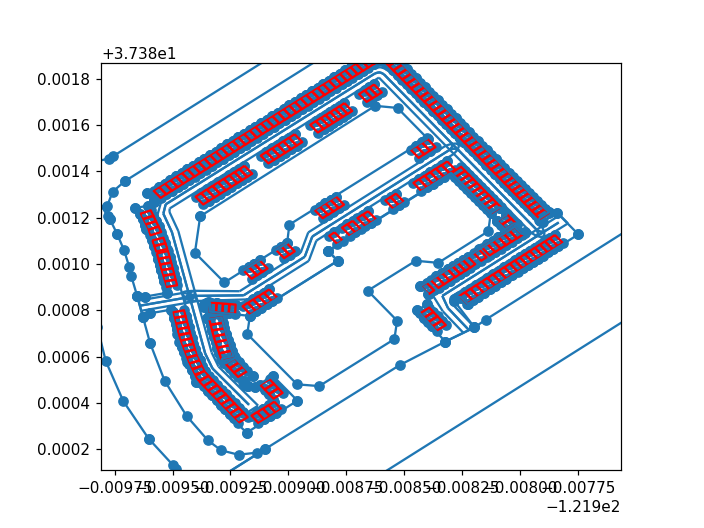

In [58]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
parkdf.plot(color='red', ax= ax)
noparkdf.plot(ax = ax )